<a href="https://colab.research.google.com/github/junxnone/samples/blob/main/hf/hf_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip -q install datasets

In [3]:
from datasets import load_dataset, Image

In [4]:
# prompt: load beans dataset only 150 samples

dataset = load_dataset("beans", split='train[:150]')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
dataset

Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 150
})

In [8]:
dataset[0]

{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 0,
 'pixel_values': tensor([[[0.1294, 0.1294, 0.1294,  ..., 0.6980, 0.0196, 0.0000],
          [0.1176, 0.1216, 0.1216,  ..., 0.5490, 0.1922, 0.0000],
          [0.1176, 0.1216, 0.1216,  ..., 0.5843, 0.2353, 0.1647],
          ...,
          [0.0863, 0.0471, 0.0902,  ..., 0.8902, 0.9608, 0.8549],
          [0.0588, 0.0510, 0.1451,  ..., 0.9176, 0.8627, 0.9059],
          [0.0980, 0.0784, 0.0431,  ..., 0.8235, 0.8941, 0.8627]],
 
         [[0.0078, 0.0078, 0.0078,  ..., 0.6667, 0.0196, 0.0314],
          [0.0000, 0.0039, 0.0039,  ..., 0.5098, 0.1765, 0.0235],
          [0.0000, 0.0039, 0.0078,  ..., 0.5098, 0.1961, 0.1294],
          ...,
          [0.0863, 0.0510, 0.0863,  ..., 0.5137, 0.5843, 0.4745],

## Augmentations


In [9]:
from torchvision.transforms import Compose, ColorJitter, ToTensor
jitter = Compose(
    [ColorJitter(brightness=0.5, hue=0.5), ToTensor()]
)

def transforms(examples):
    examples["pixel_values"] = [jitter(image.convert("RGB")) for image in examples["image"]]
    return examples

dataset = dataset.with_transform(transforms)


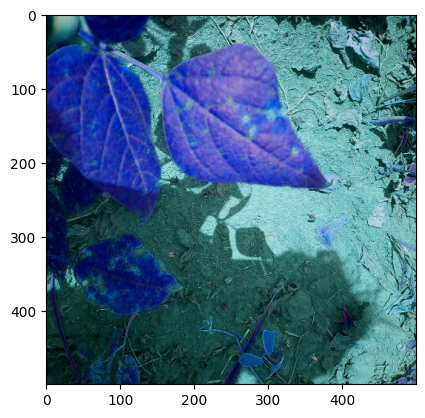

In [10]:
# prompt: show the dataset[0]['pixel_values'] as image

import matplotlib.pyplot as plt
import numpy as np

# Assuming dataset[0]['pixel_values'] is a tensor
pixel_values = dataset[0]['pixel_values'].numpy()

# Transpose to (height, width, channels) if needed
if len(pixel_values.shape) == 3 and pixel_values.shape[0] == 3:
  pixel_values = pixel_values.transpose(1, 2, 0)

# Display the image
plt.imshow(pixel_values)
plt.show()

In [11]:

# Get the unique labels and their IDs
labels = dataset.features['labels'].names
label_ids = list(range(len(labels)))

# Print the labels and their corresponding IDs
for label_id, label in zip(label_ids, labels):
  print(f"Label ID: {label_id}, Label: {label}")

Label ID: 0, Label: angular_leaf_spot
Label ID: 1, Label: bean_rust
Label ID: 2, Label: healthy


## shuffle and sort dataset

In [12]:
shuffle_dataset = dataset.shuffle(seed=42)
shuffle_dataset[:10]['labels']

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [13]:
sorted_dataset = shuffle_dataset.sort("labels")
sorted_dataset[:10]['labels']

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## add new features

In [14]:
def add_label_name(examples):
    examples["label_name"] = dataset.features["labels"].int2str(examples["labels"])
    return examples

new_dataset = dataset.map(add_label_name)

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

In [19]:
dataset

Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 150
})

In [16]:
new_dataset

Dataset({
    features: ['image_file_path', 'image', 'labels', 'pixel_values', 'label_name'],
    num_rows: 150
})

In [20]:
new_dataset[0]

{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 0,
 'pixel_values': tensor([[[0.2824, 0.2824, 0.2980,  ..., 1.0000, 0.3882, 0.2784],
          [0.2784, 0.2824, 0.2980,  ..., 1.0000, 0.4314, 0.2627],
          [0.2706, 0.2784, 0.2941,  ..., 0.8784, 0.5961, 0.5843],
          ...,
          [0.3098, 0.2980, 0.2902,  ..., 0.9608, 0.8353, 0.7451],
          [0.3059, 0.2941, 0.2824,  ..., 0.8510, 0.8196, 0.8157],
          [0.3059, 0.2902, 0.2706,  ..., 0.7765, 0.8196, 0.8588]],
 
         [[0.2000, 0.2000, 0.2039,  ..., 0.8118, 0.1451, 0.0392],
          [0.1922, 0.2000, 0.2000,  ..., 0.7765, 0.1922, 0.0235],
          [0.1922, 0.1922, 0.1882,  ..., 0.6549, 0.3725, 0.3569],
          ...,
          [0.1412, 0.1294, 0.1294,  ..., 1.0000, 0.9804, 0.8902],